In [362]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc("figure", figsize=(10, 6))
plt.rc("font", size=12)

In [363]:
plt.rc("figure", figsize=(10, 6))
plt.rc("font", size=12)
text_dat = "-0.3362 1.806 2.8101 0.6112 2.2959 2.8481 0.1808 0.5416 2.793 2.0963 3.5 3.9834 4.2866 5.3261 5.2257 6.3355 4.6026 6.5253 7.2156 6.6904 9.5773"
y_observed = np.array(list(map(float, text_dat.split())))
x = np.linspace(0, 2, len(y_observed))[:, None]


def f_true(x):
    return 1 + 0.8 * x + 0.6 * x**2 + 0.3 * x**3 + 0.1 * x**4 + 0.01 * x**5

In [364]:
def MSE(y_predict, y_true):
    return ((y_predict - y_true) ** 2).mean()


def TrainRegression(F, y, lambda_):
    I = np.eye(F.shape[1])
    w = np.linalg.inv(F.T @ F + lambda_ * I) @ F.T @ y
    return w


def CalculateLoss(F_train, y_train, F_test, y_test, lambda_):
    w = TrainRegression(F_train, y_train, lambda_)
    y_predict = F_test @ w
    return MSE(y_predict, y_test)

In [365]:
def LOOCVLoss(F, y, lambda_):
    loss = 0.0
    examples = F.shape[0]

    for example in range(examples):
        F_train = np.delete(F, example, axis=0)
        y_train = np.delete(y, example, axis=0)
        F_test = F[example, None]
        y_test = y[example, None]

        loss += CalculateLoss(F_train, y_train, F_test, y_test, lambda_)

    return loss / examples

In [366]:
def LOOCVLossFast(F, y, lambda_):
    I = np.eye(F.shape[1])
    h = F @ np.linalg.inv(F.T @ F + lambda_ * I) @ F.T
    t = h @ y
    losses = ((y - t) / (1 - h.diagonal())) ** 2
    return losses.mean()

In [367]:
losses = [
    (LOOCVLoss(x, y_observed, lambda_), LOOCVLossFast(x, y_observed, lambda_))
    for lambda_ in np.logspace(-10, 3)
]

print(
    f"Does formula give the same answer as manual calculations?\n",
    np.allclose(*zip(*losses)),
)

Does formula give the same answer as manual calculations?
 True


In [368]:
def GetPolynomialFeatures(F, degree):
    return np.array([F[:, 0] ** d for d in range(degree + 1)]).T


def GridSearchLambda(F, y, lambdas):
    losses = [LOOCVFast(F, y, lambda_) for lambda_ in lambdas]
    argmin = np.argmin(losses)
    x, y = lambdas[argmin], losses[argmin]

    plt.title("Cross validation mse losses")
    plt.plot(lambdas, losses)
    plt.xlabel("lambda")
    plt.ylabel("loss")
    plt.annotate(
        f"min at ({x:.2f}, {y:.2f})",
        xy=(x, y),
        xytext=(50, 100),
        textcoords="offset points",
        arrowprops=dict(facecolor="black", shrink=0.05),
    )

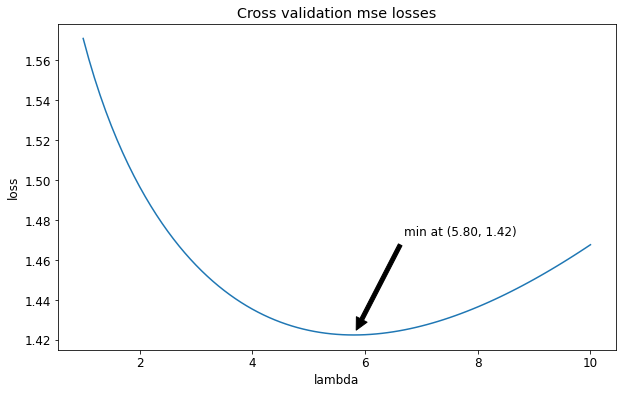

In [369]:
lambdas = np.linspace(1, 10, int(1 + (10 - 1) / 0.1))
F_poly = GetPolynomialFeatures(x, 5)
GridSearchLambda(F_poly, y_observed, lambdas)

In [370]:
def PlotForLambdas(F, y, lambdas):
    plt.figure(figsize=(16, 8))
    plt.title("Recovered dependecies for different regularization coefficient")
    plt.plot(F, y, label="observations")
    plt.plot(F, [f_true(i) for i in F[:, 0]], label="true dependency", c="red")

    F_poly = GetPolynomialFeatures(F, 5)
    min_loss = min(LOOCVFast(F, y, lambda_) for lambda_ in lambdas)
    for lambda_ in lambdas:
        w = TrainRegression(F_poly, y, lambda_)
        loss = LOOCVFast(F_poly, y, lambda_)
        plt.plot(
            F,
            F_poly @ w,
            "--",
            alpha=(min_loss / loss) ** 2 * 0.7,
            label=f"lambda {lambda_:.2f}, loss {loss:.2f}",
        )

    plt.legend()

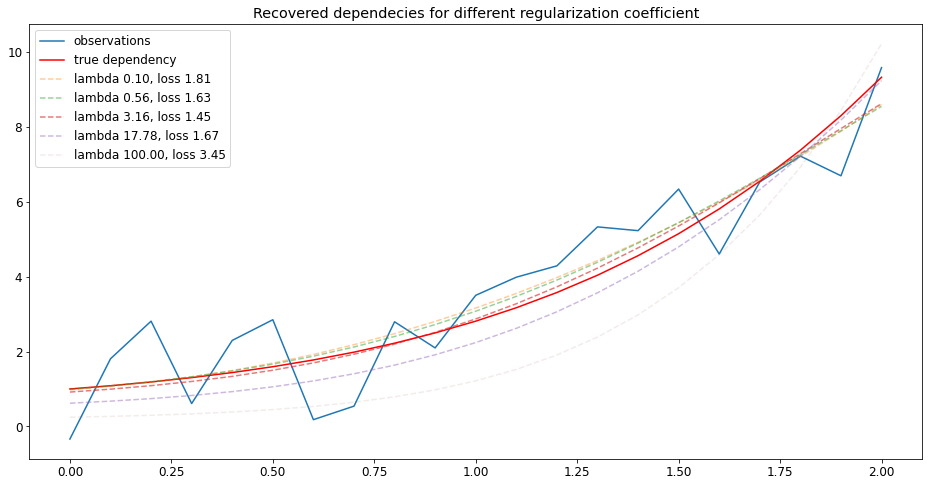

In [371]:
PlotForLambdas(x, y_observed, lambdas=np.logspace(-1, 2, 5))